### Autoregression Models for Time Series Forecasting With Python

https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt

In [2]:
import os
print(os.uname())
print(os.uname()[4])
print('---------------')

posix.uname_result(sysname='Linux', nodename='spacegray', release='5.0.0-25-generic', version='#26~18.04.1-Ubuntu SMP Thu Aug 1 13:51:02 UTC 2019', machine='x86_64')
x86_64
---------------


In [3]:
#!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

In [4]:
fn = 'daily-min-temperatures.csv'

In [5]:
!head $fn

In [6]:
series = read_csv(fn, header=0, index_col=0)
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


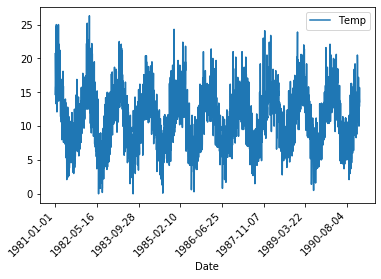

In [7]:
ax = series.plot()
fig = ax.figure
fig.autofmt_xdate(rotation=45)

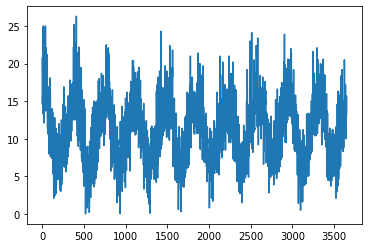

In [8]:
plt.plot(series.values)

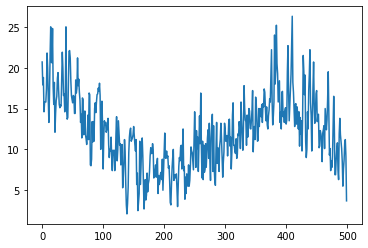

In [9]:
plt.plot(series.values[:500])

### Lag plot for time series
A lag plot checks whether a data set or time series is random or not. Random data should not exhibit any identifiable structure in the lag plot. Non-random structure in the lag plot indicates that the underlying data are not random.

https://www.itl.nist.gov/div898/handbook/eda/section3/lagplot.htm

In [10]:
from pandas.plotting import lag_plot

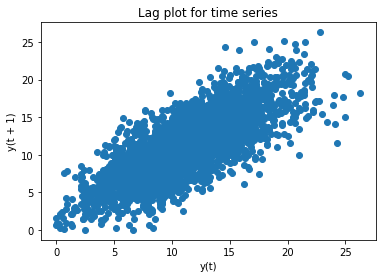

In [11]:
lag_plot(series)
plt.title('Lag plot for time series')
plt.show()

This sample lag plot of the data set exhibits a linear pattern. This shows that the data are strongly non-random and further suggests that an autoregressive model might be appropriate.

Lag plots can provide answers to the following questions:
* Are the data random?
* Is there serial correlation in the data?
* What is a suitable model for the data?
* Are there outliers in the data?

https://www.itl.nist.gov/div898/handbook/eda/section3/lagplot.htm


In [12]:
from pandas import DataFrame
from pandas import concat
values = DataFrame(series.values)

In [13]:
print(values[:5])
print('-------')
print(values.shift(1)[:5])

      0
0  20.7
1  17.9
2  18.8
3  14.6
4  15.8
-------
      0
0   NaN
1  20.7
2  17.9
3  18.8
4  14.6


In [14]:
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000


### Autocorrelation plots

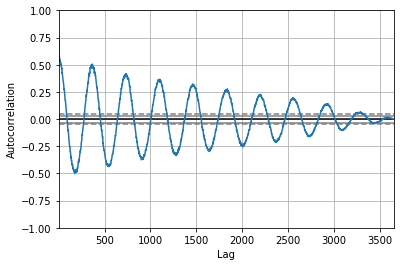

In [15]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)

plt.show()

Autocorrelation plots (Box and Jenkins, pp. 28-32) are a commonly-used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelations for data values at varying time lags. If random, such autocorrelations should be near zero for any and all time-lag separations. If non-random, then one or more of the autocorrelations will be significantly non-zero.

https://www.itl.nist.gov/div898/handbook/eda/section3/autocopl.htm

Running the example shows the swing in positive and negative correlation as the temperature values change across summer and winter seasons each previous year.

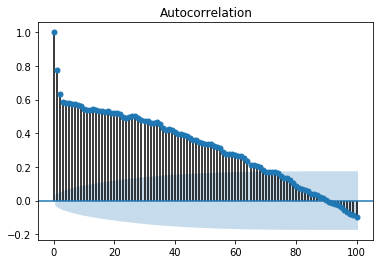

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=100)
plt.show()

In this example, we limit the lag variables evaluated to 100 for readability.